In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

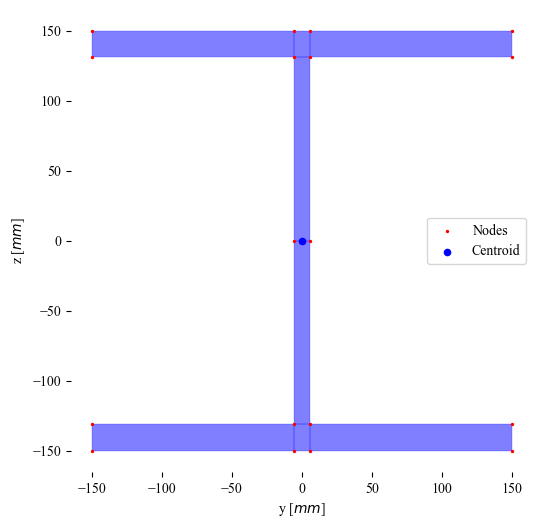

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 8             │
├────────────────────┼───────────────┤
│ Number of nodes    │ 18            │
├────────────────────┼───────────────┤
│ Cross Section Area │ 14282.00      │
╘════════════════════╧═══════════════╛
╒═══════════════════╤══════════════╤═════════════╕
│                   │            y │           z │
╞═══════════════════╪══════════════╪═════════════╡
│ Centroid          │         0.00 │        0.00 │
├───────────────────┼──────────────┼─────────────┤
│ Moment of inertia │ 241867800.67 │ 85529060.17 │
╘═══════════════════╧══════════════╧═════════════╛


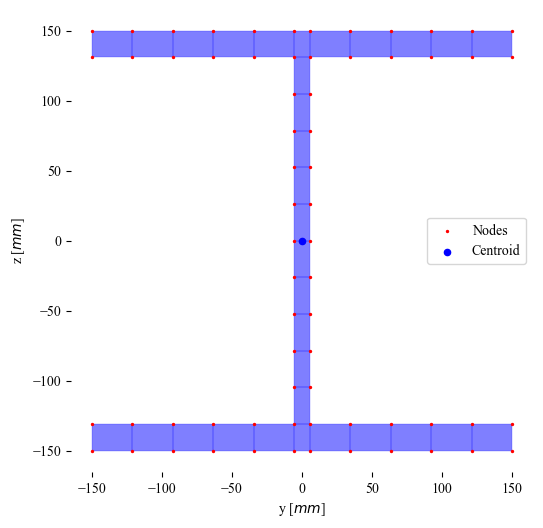

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 32            │
├────────────────────┼───────────────┤
│ Number of nodes    │ 66            │
├────────────────────┼───────────────┤
│ Cross Section Area │ 14282.00      │
╘════════════════════╧═══════════════╛
╒═══════════════════╤══════════════╤═════════════╕
│                   │            y │           z │
╞═══════════════════╪══════════════╪═════════════╡
│ Centroid          │        -0.00 │        0.00 │
├───────────────────┼──────────────┼─────────────┤
│ Moment of inertia │ 241867800.67 │ 85529060.17 │
╘═══════════════════╧══════════════╧═════════════╛


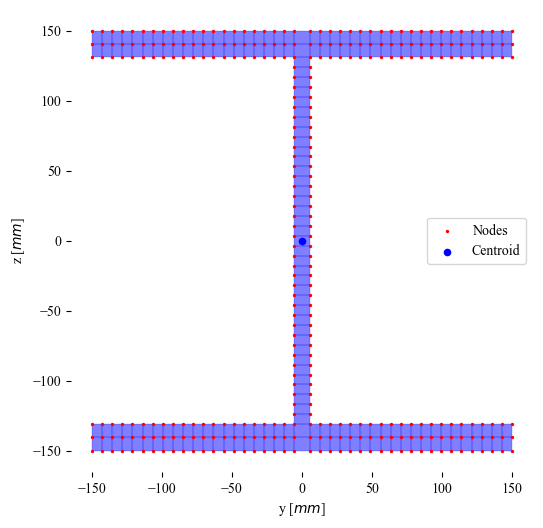

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 201           │
├────────────────────┼───────────────┤
│ Number of nodes    │ 324           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 14282.00      │
╘════════════════════╧═══════════════╛
╒═══════════════════╤══════════════╤═════════════╕
│                   │            y │           z │
╞═══════════════════╪══════════════╪═════════════╡
│ Centroid          │        -0.00 │        0.00 │
├───────────────────┼──────────────┼─────────────┤
│ Moment of inertia │ 241867800.67 │ 85529060.17 │
╘═══════════════════╧══════════════╧═════════════╛


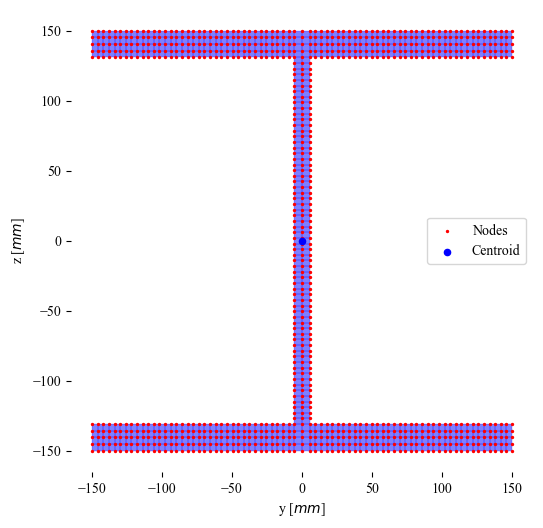

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 722           │
├────────────────────┼───────────────┤
│ Number of nodes    │ 942           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 14282.00      │
╘════════════════════╧═══════════════╛
╒═══════════════════╤══════════════╤═════════════╕
│                   │            y │           z │
╞═══════════════════╪══════════════╪═════════════╡
│ Centroid          │         0.00 │        0.00 │
├───────────────────┼──────────────┼─────────────┤
│ Moment of inertia │ 241867800.67 │ 85529060.17 │
╘═══════════════════╧══════════════╧═════════════╛


In [2]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam_1 = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=100)
beam_2 = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=25)
beam_3 = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=7)
beam_4 = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=4)
beam_1.plot()
beam_1.print()
beam_2.plot()
beam_2.print()
beam_3.plot()
beam_3.print()
beam_4.plot()
beam_4.print()


In [3]:
struc_1  = structure.Cantilever(beam        = beam_1, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)
struc_2  = structure.Cantilever(beam        = beam_2, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)
struc_3  = structure.Cantilever(beam        = beam_3, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)
struc_4  = structure.Cantilever(beam        = beam_4, 
								length      = 1000, 
								load_DOFs   = [6+2],
								nodal_loads = [1],
								number_of_sections_per_elemnt = 10)

In [4]:
non_linear_solver_1  = solver.Nonlinear(struc_1, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_2  = solver.Nonlinear(struc_2, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_3  = solver.Nonlinear(struc_3, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)
non_linear_solver_4  = solver.Nonlinear(struc_4, 
									    constraint     ="Displacement", 
									    controlled_DOF = 8)

In [5]:
increments = np.zeros(400)
increments.fill(0.05)

from contextlib import redirect_stdout
with open(os.devnull, 'w') as f, redirect_stdout(f):
	u_history_1, lambda_history_1 = non_linear_solver_1.solve(increments)
	u_history_2, lambda_history_2 = non_linear_solver_2.solve(increments)
	u_history_3, lambda_history_3 = non_linear_solver_3.solve(increments)
	u_history_4, lambda_history_4 = non_linear_solver_4.solve(increments)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

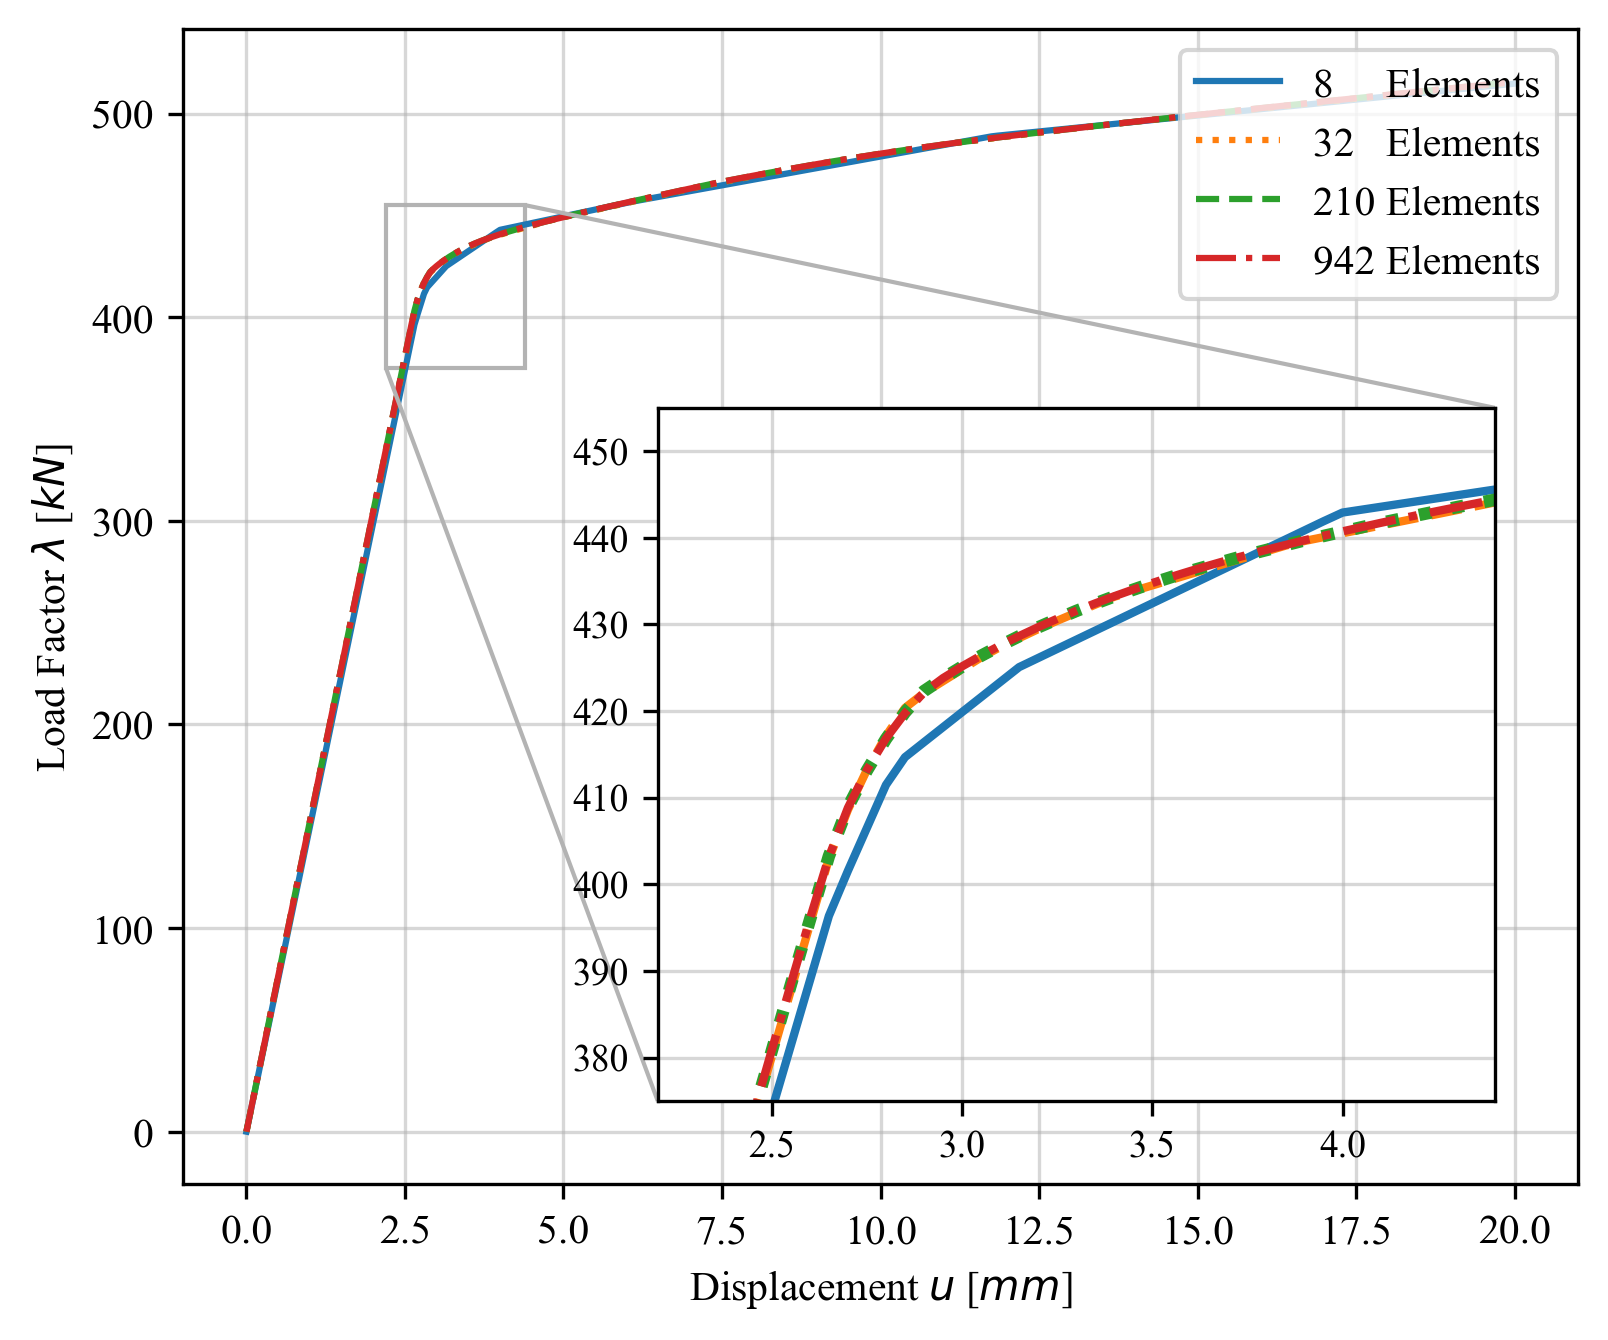

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ax.plot(u_history_1[:,6+2], lambda_history_1/1000, label="8     Elements", ls="-")
ax.plot(u_history_2[:,6+2], lambda_history_2/1000, label="32   Elements", ls="dotted")
ax.plot(u_history_3[:,6+2], lambda_history_3/1000, label="210 Elements", ls="dashed")
ax.plot(u_history_4[:,6+2], lambda_history_4/1000, label="942 Elements", ls="dashdot")
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="upper right")
ax.grid(alpha=0.5)

# Inset plot
axins = inset_axes(ax, width="60%", height="60%", loc='lower right', borderpad=2)
axins.plot(u_history_1[:,6+2], lambda_history_1/1000, ls="-"      , lw=2)
axins.plot(u_history_2[:,6+2], lambda_history_2/1000, ls="dashed" , lw=2)
axins.plot(u_history_3[:,6+2], lambda_history_3/1000, ls="dotted" , lw=3)
axins.plot(u_history_4[:,6+2], lambda_history_4/1000, ls="dashdot", lw=2)
axins.set_xlim(2.2, 4.4) 
axins.set_ylim(375, 455)
axins.tick_params(axis='both', which='both', labelsize=9)
axins.grid(alpha=0.5)

# Draw a box and lines to show zoom area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.7")

plt.show()
